# breast cancer

In [1]:
from sklearn.datasets import load_breast_cancer


bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## dataset info

In [2]:
bc.target[0], bc.target[200], bc.target[45]

(0, 1, 0)

In [3]:
bc.target.shape

(569,)

In [4]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [5]:
bc.data.shape

(569, 30)

## preprocessing

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train[0]

array([0.32935775, 0.11701048, 0.32147053, 0.19117709, 0.78386011,
       0.23977057, 0.2366448 , 0.32877734, 0.43192739, 0.30770851,
       0.15737824, 0.50274045, 0.15709372, 0.07085944, 0.38520609,
       0.22695046, 0.12027778, 0.54044327, 0.13041031, 0.16006799,
       0.2379936 , 0.08955224, 0.21968226, 0.11504621, 0.45057122,
       0.10585907, 0.12452077, 0.34879725, 0.1172876 , 0.11471861])

# classification

## preformance metrics

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score


def cmet(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true= y_test, y_pred= y_pred_test)

    r = recall_score(y_true= y_test, y_pred= y_pred_test)

    p = precision_score(y_true= y_test, y_pred= y_pred_test)

    print(f'acc train = {acc_train * 100}, acc test = {acc_test * 100}, precision = {p * 100}, recall = {r * 100}')
    return acc_test, acc_train, r, p



## 1.naive base

In [9]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 95.16483516483515, acc test = 86.8421052631579, precision = 98.27586206896551, recall = 80.28169014084507


## 2.KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [12]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 97.58241758241758, acc test = 92.10526315789474, precision = 94.28571428571428, recall = 92.95774647887323


## 3.decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [14]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 100.0, acc test = 85.08771929824562, precision = 98.21428571428571, recall = 77.46478873239437


## 4.random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=4, n_estimators=1000)

In [16]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 100.0, acc test = 89.47368421052632, precision = 98.36065573770492, recall = 84.50704225352112


## 5.SVM

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [18]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 98.9010989010989, acc test = 93.85964912280701, precision = 98.48484848484848, recall = 91.54929577464789


## 6.logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 97.8021978021978, acc test = 94.73684210526315, precision = 98.50746268656717, recall = 92.95774647887323


## 7.ANN

In [21]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='sgd',batch_size=64)
ann.fit(x_train, y_train)

c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256, solver='sgd')

In [22]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 94.94505494505493, acc test = 90.35087719298247, precision = 95.45454545454545, recall = 88.73239436619718


# comparison

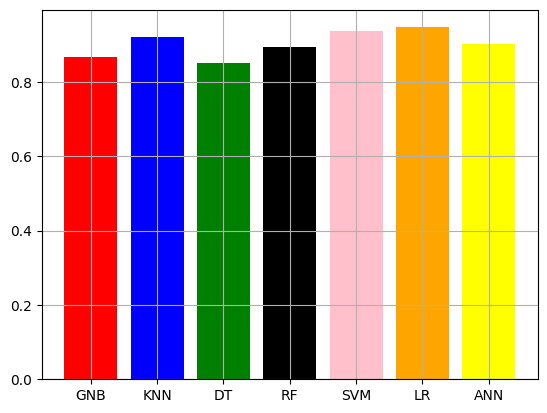

In [23]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, acc_train, color= colors)
plt.grid()
plt.show()

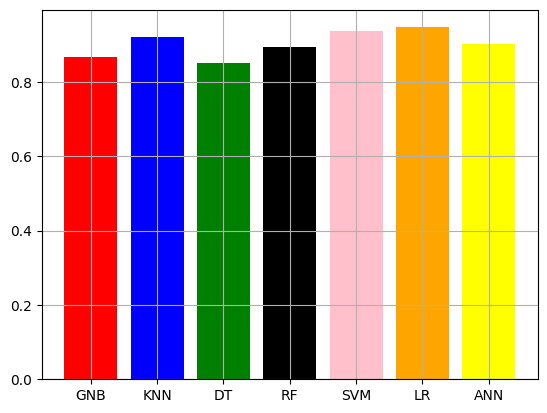

In [24]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, acc_train, color= colors)
plt.grid()
plt.show()

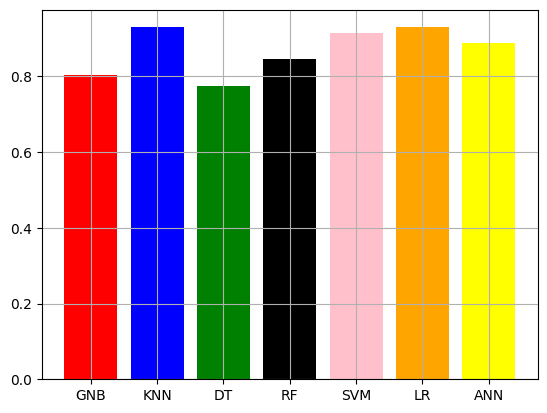

In [25]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, p, color= colors)
plt.grid()
plt.show()

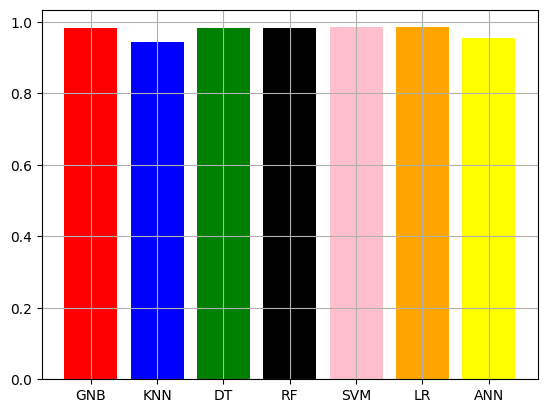

In [26]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, r, color= colors)
plt.grid()
plt.show()